<a href="https://colab.research.google.com/github/SlehChaouch/Stock-market-forecasting-using-LSTM-and-MLP/blob/main/Stock_market_forecasting_Mini_projet_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction And Forecasting Using LSTM

---





# APPLE

In [23]:
# Importation des données
from google.colab import files
data_to_load = files.upload()

In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(data_to_load['AAPL.csv']))

In [22]:
df.head() # cours de l'action en 2015

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-21,668.500000,669.900024,658.929993,664.510010,664.510010,3250900
1,2015-12-22,666.830017,668.489990,659.260010,663.150024,663.150024,2667800
2,2015-12-23,666.500000,666.599976,656.630005,663.700012,663.700012,2722900
3,2015-12-24,663.349976,664.679993,660.599976,662.789978,662.789978,1091200
4,2015-12-28,665.559998,675.500000,665.500000,675.200012,675.200012,3783600


In [ ]:
df.tail() # cours de l'action en 2020

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2020-05-15,75.087502,76.974998,75.052498,76.927498,76.187111,166348400
1253,2020-05-18,78.292503,79.125000,77.580002,78.739998,77.982170,135178400
1254,2020-05-19,78.757500,79.629997,78.252502,78.285004,77.531563,101729600
1255,2020-05-20,79.169998,79.879997,79.129997,79.807503,79.039398,111504800
1256,2020-05-21,79.665001,80.222504,78.967499,79.212502,78.450134,102688800


In [24]:
# Affichage de prix de fermeture journalier
df1=df.reset_index()['Close']
df1

0        664.510010
1        663.150024
2        663.700012
3        662.789978
4        675.200012
           ...     
1254    3156.969971
1255    3165.120117
1256    3240.959961
1257    3236.080078
1258    3201.649902
Name: Close, Length: 1259, dtype: float64

In [ ]:
df1.isnull().values.any()

False

In [16]:
# Visualisation de variable close en fonction de date
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
min1 , max1 = min(df1),max(df1)
min1 , max1

(482.07000700000003, 3531.4499509999996)

# Pre-processing

In [25]:
#On applique le scaler MinMax.
import numpy as np
from sklearn.preprocessing import MinMaxScaler # importation à partir de bibliothéque de pre-processing de scikit learn, la méthode MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) # création d'une fonction de normalisation
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) # appliquer la normalisation sur df1 tout en créant une nouvelle matrice à la place de df1 précédente 

In [ ]:
df1.shape

(1259, 1)

In [26]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [27]:
import numpy as np
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [28]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
X_train.shape, y_train.shape, X_test.shape, ytest.shape

((843, 100), (843,), (214, 100), (214,))

# Prédiction par la méthode de MultiLayer Perceptron

In [30]:
from sklearn.neural_network import MLPRegressor

In [ ]:
#GridSearchCV pour trouver les meilleurs hyperparamètres pour notre modéle
from sklearn.model_selection import GridSearchCV
regressor = MLPRegressor()
params_regressor = {'hidden_layer_sizes':[[8,32,64,128],[8,32,64]],'activation':['tanh','relu','logistic'],'batch_size':[128,256,200],'learning_rate':['adaptive','constant','invscaling'],'learning_rate_init':[0.01,0.005,0.05],'max_iter':[2000,1000,3000]}
regressor_GS = GridSearchCV(regressor, param_grid=params_regressor, n_jobs=-1)
regressor_GS.fit(X_train, y_train)
regressor_GS.best_params_

{'activation': 'logistic',
 'batch_size': 128,
 'hidden_layer_sizes': [8, 32, 64],
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.01,
 'max_iter': 3000}

In [56]:
# Hyperparamètres
validation_size = 0.1
layers = (64,32, 8)
Lambda = 1e-05
batch_size = 128
initial_learning_rate = 0.01
epochs = 2000

In [57]:
# Initialisation du modèle de régresseur
regressor = MLPRegressor(
        hidden_layer_sizes=layers,
        activation='relu',
        solver='adam',
        alpha=Lambda,
        batch_size=batch_size,
        learning_rate='adaptive',
        learning_rate_init=initial_learning_rate,
        max_iter=epochs,
        shuffle=True,
        tol=0.0001,
        verbose=False,
        early_stopping=True,
        validation_fraction=validation_size)

In [58]:
# Entraîner le régresseur
avg_score = 0
avg_error = 0
min_error = 1
max_error = 0
avg_conv_iter = 0
for i in range(10) :
    regressor.fit(X_train, y_train) 
    avg_score += regressor.best_validation_score_
    avg_conv_iter += regressor.n_iter_
    cur_error = 1 - regressor.best_validation_score_
    avg_error += cur_error
    min_error = min(cur_error, min_error)
    max_error = max(cur_error, max_error)

avg_score /= 10
avg_error /= 10
avg_conv_iter /= 10

In [59]:
print('avg_score    :', round(avg_score, 2))
print('avg_error    :', round(avg_error, 2))
print('max_error    :', round(max_error, 2))
print('min_error    :', round(min_error, 2))
print('avg_conv_iter:', round(avg_conv_iter, 2))
print('Regressor Score:', regressor.score(X_test, ytest))

avg_score    : 0.99
avg_error    : 0.01
max_error    : 0.02
min_error    : 0.01
avg_conv_iter: 83.3
Regressor Score: 0.955334921055037


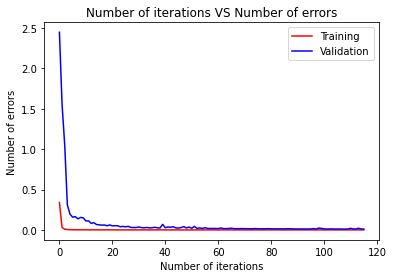

In [60]:
#Tracé des courbes d'erreur de gradient
plt.plot(np.arange(0, len(regressor.loss_curve_)), regressor.loss_curve_, color='red', label='Training')
plt.plot(np.arange(0, len(regressor.validation_scores_)), 1 - np.array(regressor.validation_scores_), color='blue', label='Validation')
# définir le titre et les labels
plt.title('Number of iterations VS Number of errors')
plt.xlabel('Number of iterations')
plt.ylabel('Number of errors')
plt.legend()
## affichage du graphique
plt.show()

In [61]:
## Faisons la prédiction et vérifions les métriques de performance
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

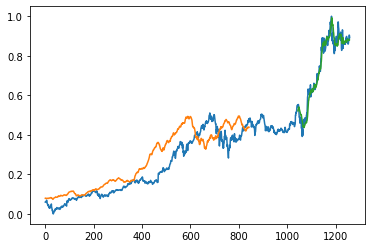

In [62]:
## Plotting
look_back=100
trainPredictPlot = np.zeros(len(df1))
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict
trainPredictPlot = trainPredictPlot[trainPredictPlot!=0]
# les prédictions de test de décalage pour le traçage(plotting)
testPredictPlot = np.zeros(len(df1))
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1] = test_predict
testPredictPlot = testPredictPlot[testPredictPlot!=0]
# plot base de référence et predictions
plt.plot(df1)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Création de model LSTM

Pre-processing  de nouveau

In [ ]:
#On repete certain étape de pre-processing à nouveau car il ya des étapes spécifiques au modéle LSTM
#Division de l'ensemble de données en deux parties, l'une pour l'entraînement et l'autre pour le test.
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size


(942, 315)

In [ ]:
#convertir un tableau de valeurs en une matrice de dataset
import numpy as np
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape à X=t,t+1,t+2,t+3 et Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
(X_train.shape, y_train.shape)


((841, 100), (841,))

In [ ]:
(X_test.shape, ytest.shape)


((214, 100), (214,))

In [ ]:
# reshape l'entrée pour qu'elle soit [samples, time steps, features] ce qui est nécessaire pour les LSTM.
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [12]:
# Importation des bibliothéques
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model=Sequential()
#Ajout de première couche LSTM et d'une régularisation Dropout.
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
# Ajout d'une deuxième couche LSTM et d'une régularisation Dropout.
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
# Ajout d'une troisième couche LSTM et d'une régularisation Dropout.
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
# Ajout de la couche de sortie(output layer)
model.add(Dense(1))
# Compiler le RNN
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_12 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 50)               

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 18s 418ms/step - loss: 0.0289 - val_loss: 0.1487
Epoch 2/100
14/14 [==============================] - 4s 278ms/step - loss: 0.0066 - val_loss: 0.0468
Epoch 3/100
14/14 [==============================] - 4s 280ms/step - loss: 0.0024 - val_loss: 0.0056
Epoch 4/100
14/14 [==============================] - 4s 275ms/step - loss: 0.0020 - val_loss: 0.0073
Epoch 5/100
14/14 [==============================] - 4s 280ms/step - loss: 0.0017 - val_loss: 0.0051
Epoch 6/100
14/14 [==============================] - 4s 277ms/step - loss: 0.0014 - val_loss: 0.0082
Epoch 7/100
14/14 [==============================] - 4s 279ms/step - loss: 0.0014 - val_loss: 0.0157
Epoch 8/100
14/14 [==============================] - 4s 280ms/step - loss: 0.0018 - val_loss: 0.0117
Epoch 9/100
14/14 [==============================] - 4s 280ms/step - loss: 0.0015 - val_loss: 0.0064
Epoch 10/100
14/14 [==============================] - 4s 301ms/step - loss: 0.0016 - val_l

In [ ]:
import tensorflow as tf

In [ ]:
## Faisons la prédiction et vérifions les métriques de performance
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
## Calculer les paramètres de performance RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))  # RMSE pour les données de Train

0.017354239802288455

In [ ]:
### RSME pour les données de Test
math.sqrt(mean_squared_error(ytest,test_predict))

0.09902399079530518

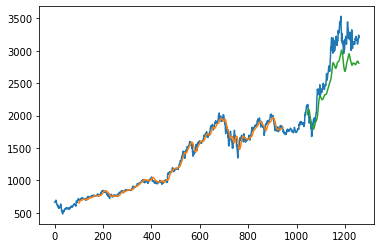

In [ ]:
## Plotting 
##prédictions de train de décalage pour le traçage
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# les prédictions de test de décalage pour le traçage(plotting)
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot base de référence et predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(scaler.inverse_transform(trainPredictPlot))
plt.plot(scaler.inverse_transform(testPredictPlot))
plt.show()

### AMAZON

In [ ]:
# Importation des données
from google.colab import files
data_to_load = files.upload()

Saving AAPL.csv to AAPL (2).csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(data_to_load['AAPL.csv']))

In [ ]:
df.head() # cours de l'action en 2015

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-27,32.584999,33.064999,32.512501,33.009998,30.129501,183332800
1,2015-05-28,32.965000,32.987499,32.775002,32.945000,30.070181,122933200
2,2015-05-29,32.807499,32.862499,32.474998,32.570000,29.727898,203538000
3,2015-06-01,32.570000,32.847500,32.512501,32.634998,29.787231,128451200
4,2015-06-02,32.465000,32.665001,32.330002,32.490002,29.654886,134670400


In [ ]:
df.tail() # cours de l'action en 2020

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2020-05-15,75.087502,76.974998,75.052498,76.927498,76.187111,166348400
1253,2020-05-18,78.292503,79.125000,77.580002,78.739998,77.982170,135178400
1254,2020-05-19,78.757500,79.629997,78.252502,78.285004,77.531563,101729600
1255,2020-05-20,79.169998,79.879997,79.129997,79.807503,79.039398,111504800
1256,2020-05-21,79.665001,80.222504,78.967499,79.212502,78.450134,102688800


In [ ]:
# Affichage de prix de fermeture journalier
df1=df.reset_index()['Close']
df1

0       33.009998
1       32.945000
2       32.570000
3       32.634998
4       32.490002
          ...    
1252    76.927498
1253    78.739998
1254    78.285004
1255    79.807503
1256    79.212502
Name: Close, Length: 1257, dtype: float64

In [ ]:
df1.isnull().values.any()

False

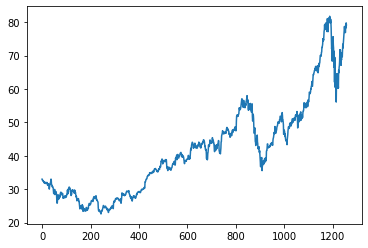

In [ ]:
# Visualisation de variable close en fonction de date
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
min1 , max1 = min(df1),max(df1)
min1 , max1

(482.07000700000003, 3531.4499509999996)

# Pre-processing

In [ ]:
#On applique le scaler MinMax.
import numpy as np
from sklearn.preprocessing import MinMaxScaler # importation à partir de bibliothéque de pre-processing de scikit learn, la méthode MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) # création d'une fonction de normalisation
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) # appliquer la normalisation sur df1 tout en créant une nouvelle matrice à la place de df1 précédente 

In [ ]:
df1.shape

(1259, 1)

In [ ]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy as np
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, ytest.shape

((843, 100), (843,), (214, 100), (214,))

In [ ]:
# reshape l'entrée pour qu'elle soit [samples, time steps, features] ce qui est nécessaire pour les LSTM.
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
#Ajout de la première couche LSTM et de la régularisation Dropout.
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
# Ajout d'une deuxième couche LSTM et d'une régularisation Dropout.
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
# Ajout d'une troisième couche LSTM et d'une régularisation Dropout.
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
# Ajout de la couche de sortie(Output Layer)
model.add(Dense(1))
# Compiler le RNN (LSTM)
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_12 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 50)               

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 18s 418ms/step - loss: 0.0289 - val_loss: 0.1487
Epoch 2/100
14/14 [==============================] - 4s 278ms/step - loss: 0.0066 - val_loss: 0.0468
Epoch 3/100
14/14 [==============================] - 4s 280ms/step - loss: 0.0024 - val_loss: 0.0056
Epoch 4/100
14/14 [==============================] - 4s 275ms/step - loss: 0.0020 - val_loss: 0.0073
Epoch 5/100
14/14 [==============================] - 4s 280ms/step - loss: 0.0017 - val_loss: 0.0051
Epoch 6/100
14/14 [==============================] - 4s 277ms/step - loss: 0.0014 - val_loss: 0.0082
Epoch 7/100
14/14 [==============================] - 4s 279ms/step - loss: 0.0014 - val_loss: 0.0157
Epoch 8/100
14/14 [==============================] - 4s 280ms/step - loss: 0.0018 - val_loss: 0.0117
Epoch 9/100
14/14 [==============================] - 4s 280ms/step - loss: 0.0015 - val_loss: 0.0064
Epoch 10/100
14/14 [==============================] - 4s 301ms/step - loss: 0.0016 - val_l

In [ ]:
import tensorflow as tf

In [ ]:
## Faisons la prédiction et vérifions les métriques de performance
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
## Calculer les paramètres de performance RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))  # RMSE pour les données de Train

0.017354239802288455

In [ ]:
### RSME pour les données de Test
math.sqrt(mean_squared_error(ytest,test_predict))

0.09902399079530518

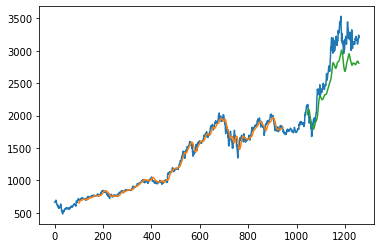

In [ ]:
## Plotting 
##prédictions de train de décalage pour le traçage
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# les prédictions de test de décalage pour le traçage(plotting)
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot base de référence et predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(scaler.inverse_transform(trainPredictPlot))
plt.plot(scaler.inverse_transform(testPredictPlot))
plt.show()

# Multivariable LSTM using 4 features to predict "open" price for AMAZON

In [1]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving AMZN.csv to AMZN.csv


In [4]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(data_to_load['AMZN.csv']))

In [5]:
#Séparer les dates pour un traçage futur
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15)) #Vérifier les dernières dates

1244   2020-11-30
1245   2020-12-01
1246   2020-12-02
1247   2020-12-03
1248   2020-12-04
1249   2020-12-07
1250   2020-12-08
1251   2020-12-09
1252   2020-12-10
1253   2020-12-11
1254   2020-12-14
1255   2020-12-15
1256   2020-12-16
1257   2020-12-17
1258   2020-12-18
Name: Date, dtype: datetime64[ns]


In [6]:
#Variables explicatives
cols = list(df)[1:5]
#Les colonnes de date, Close Adj et volume ne sont pas utilisées dans l'apprentissage. 
print(cols) #['Open', 'High', 'Low', 'Close']

['Open', 'High', 'Low', 'Close']


In [7]:
#Nouveau dataframe avec uniquement des données de training - 4 colonnes
df_for_training = df[cols].astype(float)

In [8]:
#Le LSTM utilise la sigmoide et la tanh qui sont sensibles à la grandeur, les valeurs doivent donc être normalisées.
# normaliser l'ensemble des données
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [10]:
#le n_features est 4. Nous ferons timesteps = 30 (données des derniers jours utilisées pour le training). 
#Listes vides à remplir à l'aide de données de training formatées
import numpy as np
trainX = []
trainY = []
n_future = 1   #Nombre de jours où l'on veut se projeter dans l'avenir sur la base des jours passés.
n_past = 30  # Nombre de jours passés que nous voulons utiliser pour prédire le futur.
#Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (1229, 30, 4).
trainY shape == (1229, 1).


In [13]:
#definir the modèle
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
70/70 [==============================] - 2s 28ms/step - loss: 0.0130 - val_loss: 0.0492
Epoch 2/100
70/70 [==============================] - 2s 26ms/step - loss: 0.0117 - val_loss: 0.0057
Epoch 3/100
70/70 [==============================] - 2s 26ms/step - loss: 0.0132 - val_loss: 0.0128
Epoch 4/100
70/70 [==============================] - 2s 34ms/step - loss: 0.0110 - val_loss: 0.0216
Epoch 5/100
70/70 [==============================] - 3s 46ms/step - loss: 0.0127 - val_loss: 0.0069
Epoch 6/100
70/70 [==============================] - 3s 48ms/step - loss: 0.0121 - val_loss: 0.0726
Epoch 7/100
70/70 [==============================] - 3s 47ms/step - loss: 0.0127 - val_loss: 0.0195
Epoch 8/100
70/70 [==============================] - 3s 48ms/step - loss: 0.0117 - val_loss: 0.0119
Epoch 9/100
70/70 [==============================] - 4s 51ms/step - loss: 0.0114 - val_loss: 0.0529
Epoch 10/100
70/70 [==============================] - 3s 50ms/step - loss: 0.0134 - val_loss: 0.0049

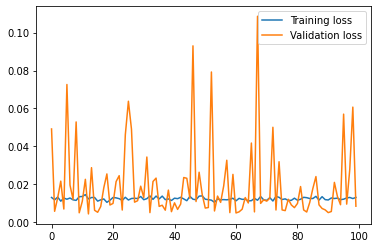

In [18]:
# fit le modèle
history = model.fit(trainX, trainY, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [19]:
#Prédire
#Les bibliothèques qui nous aideront à extraire uniquement les jours ouvrables aux États-Unis.
#Sinon, nos dates seraient fausses lorsque nous regardons en arrière (ou en avant).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Rappelez-vous que nous ne pouvons prédire qu'un seul jour dans le futur car notre modèle a besoin de 4 variables.
#comme entrées pour la prédiction. Nous n'avons les 4 variables que jusqu'au dernier jour dans notre jeu de données.
n_past = 30
n_days_for_prediction=30  #prévoyons les 30 derniers jours

In [20]:
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#faisons la prédiction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) où n est le nombre de jours pour la prédiction (n_days_for_prediction)

#Effectuer une transformation inverse pour revenir à l'échelle d'origine
#Puisque nous avons utilisé 4 variables pour la transformation, l'inverse attend les mêmes dimensions.
#Par conséquent, copions nos valeurs 4 fois et rejetons-les après la transformation inverse.
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

[Timestamp('2020-11-06 00:00:00', freq='C'), Timestamp('2020-11-09 00:00:00', freq='C'), Timestamp('2020-11-10 00:00:00', freq='C'), Timestamp('2020-11-12 00:00:00', freq='C'), Timestamp('2020-11-13 00:00:00', freq='C'), Timestamp('2020-11-16 00:00:00', freq='C'), Timestamp('2020-11-17 00:00:00', freq='C'), Timestamp('2020-11-18 00:00:00', freq='C'), Timestamp('2020-11-19 00:00:00', freq='C'), Timestamp('2020-11-20 00:00:00', freq='C'), Timestamp('2020-11-23 00:00:00', freq='C'), Timestamp('2020-11-24 00:00:00', freq='C'), Timestamp('2020-11-25 00:00:00', freq='C'), Timestamp('2020-11-27 00:00:00', freq='C'), Timestamp('2020-11-30 00:00:00', freq='C'), Timestamp('2020-12-01 00:00:00', freq='C'), Timestamp('2020-12-02 00:00:00', freq='C'), Timestamp('2020-12-03 00:00:00', freq='C'), Timestamp('2020-12-04 00:00:00', freq='C'), Timestamp('2020-12-07 00:00:00', freq='C'), Timestamp('2020-12-08 00:00:00', freq='C'), Timestamp('2020-12-09 00:00:00', freq='C'), Timestamp('2020-12-10 00:00:00'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

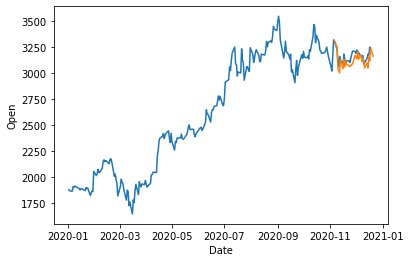

In [21]:
# Convertir l'horodatage(timestamp) en date.
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-1-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])